# Setting Preliminares

Iniciamos importando las librerías básicas que utilizaremos a lo largo del procesamiento de datos.

In [ ]:
# carga de datos
import pandas as pd
import io
from google.colab import files

# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None



# Carga de Datos

Función de Google Colab para cargar datos.

In [ ]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [ ]:
premier = upload_files() 
premier.head()

Saving europa_femenina_promedio_goles.csv to europa_femenina_promedio_goles.csv
User uploaded file "europa_femenina_promedio_goles.csv" with length 44062 bytes


,jornada,fecha,puntos_actuales,equipo,liga,entrenador_nuevo,promedio_goles_hechos_antes_de_cambio_entrenador_1_5,promedio_goles_hechos_despues_de_cambio_entrenador_1_5,promedio_goles_recibidos_antes_de_cambio_entrenador_1_5,promedio_goles_recibidos_despues_de_cambio_entrenador_1_5,puntos_hechos_antes_de_cambio_entrenador_1_5,puntos_hechos_despues_de_cambio_entrenador_1_5,porcentaje_victorias_despues_de_cambio_entrenador_1_5,porcentaje_victorias_antes_de_cambio_entrenador_1_5,porcentaje_empates_despues_de_cambio_entrenador_1_5,porcentaje_empates_antes_de_cambio_entrenador_1_5,porcentaje_derrotas_despues_de_cambio_entrenador_1_5,porcentaje_derrotas_antes_de_cambio_entrenador_1_5
0,8,15-11-2015,2,Colonia,bundesliga_femenina,Nico Reese,1.0,0.5,2.8,2.5,1,1,0.0,0.0,0.5,0.2,0.5,0.8
1,10,06-12-2015,5,Colonia,bundesliga_femenina,Marcus Kühn,1.0,0.8,2.2,1.4,2,4,0.2,0.0,0.2,0.4,0.6,0.6
2,1,03-09-2017,0,Colonia,bundesliga_femenina,Willi Breuer,1.4,0.4,3.0,3.8,6,0,0.0,0.4,0.0,0.0,1.0,0.6
3,12,04-06-2020,8,Colonia,bundesliga_femenina,Sascha Glass,2.0,1.0,3.4,1.0,3,1,0.0,0.2,1.0,0.0,0.0,0.8
4,13,15-12-2019,8,Colonia,bundesliga_femenina,Willi Breuer,2.0,0.0,3.0,1.0,4,0,0.0,0.2,0.0,0.2,1.0,0.6


In [ ]:
premier.shape

(380, 18)

Ver variables númericas

In [ ]:
premier_numeric = premier.select_dtypes(include=[np.number])
numeric_cols = premier_numeric.columns.values
print(numeric_cols)
print(len(numeric_cols))

['jornada' 'goles_local' 'goles_visitante']
3


ver tipo de datos en dataframe

In [ ]:
premier.dtypes

fecha               object
jornada              int64
local               object
visitante           object
goles_local        float64
goles_visitante    float64
dtype: object

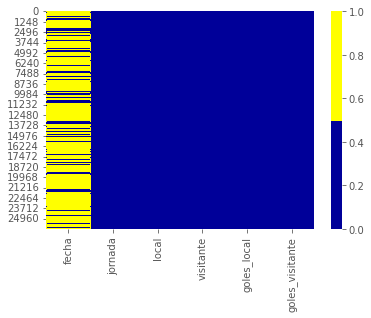

In [ ]:
cols = premier.columns[:20] # primeras columnas
colours = ['#000099', '#ffff00'] # amarillo para los perdidos y azul para los no perdidos
sns.heatmap(premier[cols].isnull(), cmap=sns.color_palette(colours))

sumatoria de datos perdidos

In [ ]:
premier.isnull().sum()

fecha              20606
jornada                0
local                  0
visitante              0
goles_local           10
goles_visitante       10
dtype: int64

verificar si hay datos perdidos

In [ ]:
pd.isnull(premier).any()

fecha               True
jornada            False
local              False
visitante          False
goles_local         True
goles_visitante     True
dtype: bool

In [ ]:
equipos=pd.unique(premier['local'])
equipos

array(['SK Brann', 'Stabæk FK', 'Rosenborg BK', 'Vålerenga IF',
       'Avaldsnes IL', 'Kolbotn IL', 'Lyn Oslo', 'Arna-Bjørnar',
       'Lillestrøm SK', 'Røa IL', 'Klepp IL', 'IL Sandviken', 'FL Fart',
       'SK Trondheims-Ørn', 'IK Grand', 'Medkila IL', 'Urædd FK',
       'Amazon Grimstad', 'Kattem IL', 'Linderud-Grei', 'IF Fløya',
       'FK Donn', 'Fortuna Ålesund', 'Team Strømmen'], dtype=object)

In [ ]:
len(equipos)

15

In [ ]:
premier[premier['local']=="Kattem IL"].sample(10)

,fecha,jornada,local,visitante,goles_local,goles_visitante
1586,NaN,3,Kattem IL,Kolbotn IL,0,1
1278,09-06-2012,10,Kattem IL,Stabæk FK,1,5
1657,NaN,13,Kattem IL,Stabæk FK,1,5
1442,NaN,5,Kattem IL,Arna-Bjørnar,2,2
1268,NaN,12,Kattem IL,Lillestrøm SK,1,2
1220,NaN,20,Kattem IL,IL Sandviken,5,3
1544,NaN,10,Kattem IL,Arna-Bjørnar,0,7
1410,05-06-2011,10,Kattem IL,Røa IL,0,1
1304,NaN,6,Kattem IL,Arna-Bjørnar,1,6
1290,26-05-2012,8,Kattem IL,SK Trondheims-Ørn,1,1


In [ ]:
premier['fecha'][1388]

'2017-01-15'

In [ ]:
premier.sample(10)

,club,fecha_activo_inicio,fecha_activo_fin,entrenador,pais,fecha_nacimiento
2436,CD Castellón,1978-01-07,1980-06-30,Paquito,España,1938-02-14
1558,Córdoba,2015-03-17,2015-06-30,José Romero,España,1959-12-26
804,Real Sociedad,1991-01-02,1991-06-30,Javier Expósito,España,1931-09-18
538,Betis,1989-05-20,1989-06-30,Buenaventura,España,1930-09-12
300,Barcelona,1983-07-03,1984-05-31,César Luis Menotti,Argentina,1938-05-11
1032,Real Madrid,2015-01-07,2016-03-01,Rafa Benítez,España,1960-04-16
681,Granada,2001-01-01,2001-12-02,Lalo,España,1936-03-14
2222,UD Salamanca,2008-01-07,2009-06-30,David Amaral,España,1958-12-10
2048,Real Murcia,1950-01-07,1950-10-31,Sierra,España,1914-01-11
532,Betis,1992-01-02,1992-06-30,Felipe Mesones,Argentina,1936-09-02


In [ ]:
premier.head(50)

,fecha,jornada,local,visitante,goles_local,goles_visitante
0,05-08-2022,1,Crystal Palace,Arsenal,NaN,NaN
1,06-08-2022,1,Fulham FC,Liverpool,NaN,NaN
2,NaN,1,Bournemouth,Aston Villa,NaN,NaN
3,NaN,1,Leeds United,Wolverhampton Wanderers,NaN,NaN
4,NaN,1,Newcastle United,Nottingham Forest,NaN,NaN
5,NaN,1,Tottenham Hotspur,Southampton,NaN,NaN
6,NaN,1,Everton,Chelsea,NaN,NaN
7,07-08-2022,1,Leicester City,Brentford FC,NaN,NaN
8,NaN,1,Manchester United,Brighton & Hove Albion,NaN,NaN
9,NaN,1,West Ham United,Manchester City,NaN,NaN
